In [1]:
import pandas as pd
import numpy as np


In [2]:
LOG_DIR = "./data/slippageLog.csv"

df = pd.read_csv(LOG_DIR, dtype=float)
stETH_percent = df["poolb1"] / (df["poolb0"] + df["poolb1"])

print(df)


             price            dy        poolb0        poolb1  ethPercent
0     1.858344e+12  3.726719e+20  6.346951e+23  3.315353e+22      9503.0
1     1.848457e+12  3.706772e+20  6.343244e+23  3.335353e+22      9500.0
2     1.838739e+12  3.687168e+20  6.339556e+23  3.355353e+22      9497.0
3     1.829187e+12  3.667899e+20  6.335887e+23  3.375353e+22      9494.0
4     1.819797e+12  3.648957e+20  6.332237e+23  3.395353e+22      9491.0
...            ...           ...           ...           ...         ...
3016  5.257317e+11  1.053021e+20  3.234254e+22  6.363535e+23       483.0
3017  5.241728e+11  1.049904e+20  3.223753e+22  6.365535e+23       482.0
3018  5.226132e+11  1.046786e+20  3.213283e+22  6.367535e+23       480.0
3019  5.210529e+11  1.043666e+20  3.202845e+22  6.369535e+23       478.0
3020  5.194920e+11  1.040545e+20  3.192437e+22  6.371535e+23       477.0

[3021 rows x 5 columns]


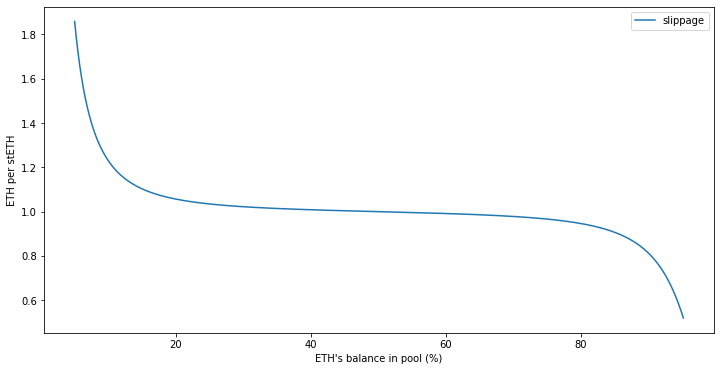

In [3]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)


ax.set_xlabel("ETH's balance in pool (%)")
ax.set_ylabel("ETH per stETH")
line_xcp, = ax.plot(stETH_percent * 100, df['price'] / 1e12, label="slippage")


ax.legend(handles=[line_xcp], loc='upper right')
plt.show()

In [5]:

def attackCost(from_percent, to_percent):
    '''calculate how many stETH need from a percent to another percent'''
    from_percent = from_percent * 100 // 1
    to_percent = to_percent * 100 // 1
    _df = df[df["ethPercent"] < from_percent]
    _df = _df[_df["ethPercent"] >= to_percent]
    # print(_df)
    amountIn = _df.shape[0] * 200 # every row amountIn is 200
    amountOut = _df['dy'].sum() / 1e18
    
    return _df["ethPercent"].max() / 100, _df["ethPercent"].min() / 100, amountIn, amountOut

for i in range(20,6,-2):
    percent_upper, percent_lower, cost, reward = attackCost(from_percent=i*1.0, to_percent=(i-2)*1.0)
    print("from {:.2f}% to {:.2f}% cost stETH {:.2f} get ETH {:.2f}".format(percent_upper, percent_lower, cost, reward))


from 19.98% to 18.01% cost stETH 13600.00 get ETH 12787.81
from 17.98% to 16.01% cost stETH 13800.00 get ETH 12778.43
from 15.98% to 14.00% cost stETH 14200.00 get ETH 12871.67
from 13.97% to 12.01% cost stETH 14400.00 get ETH 12660.79
from 11.99% to 10.02% cost stETH 15200.00 get ETH 12765.00
from 9.99% to 8.01% cost stETH 16400.00 get ETH 12790.92
from 7.99% to 6.00% cost stETH 18800.00 get ETH 12882.07
